# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libraries to build ensemble models
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    StackingClassifier,
)
from xgboost import XGBClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

<IPython.core.display.Javascript object>

## Data Overview

### Reading and Understanding Data

In [2]:
# loading the dataset
data = pd.read_csv("EasyVisa.csv")

<IPython.core.display.Javascript object>

In [3]:
# check the sample of data
data.sample(n=10, random_state=1)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
17639,EZYV17640,Asia,Bachelor's,Y,N,567,1992,Midwest,26842.9100,Year,Y,Certified
23951,EZYV23952,Oceania,Bachelor's,N,N,619,1938,Midwest,66419.9800,Year,Y,Certified
8625,EZYV8626,Asia,Master's,N,N,2635,2005,South,887.2921,Hour,Y,Certified
20206,EZYV20207,Asia,Bachelor's,Y,Y,3184,1986,Northeast,49435.8000,Year,Y,Certified
7471,EZYV7472,Europe,Bachelor's,Y,N,4681,1928,West,49865.1900,Year,Y,Denied
3433,EZYV3434,Asia,Bachelor's,Y,N,222,1989,South,813.7261,Hour,Y,Certified
24440,EZYV24441,Europe,High School,N,Y,3278,1994,South,204948.3900,Year,Y,Denied
12104,EZYV12105,Asia,Master's,Y,N,1359,1997,West,202237.0400,Year,N,Certified
15656,EZYV15657,Asia,Bachelor's,N,N,2081,2003,West,111713.0200,Year,Y,Denied
23110,EZYV23111,North America,Bachelor's,Y,N,854,1998,Northeast,444.8257,Hour,Y,Denied


<IPython.core.display.Javascript object>

#### Observations:
* Each row in the data has details about a particular case ID.
* There are 12 variables giving information about each case ID.

In [4]:
# check number of rows and columns
data.shape

(25480, 12)

<IPython.core.display.Javascript object>

#### Observations:
* There are 25480 rows and 12 columns in the data.

In [5]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

#### Observations:
* There are 2 int64, 1 float and all other variables of object data types.
* There are no missing values in any columns.

In [6]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

### Fixing the data types

In [7]:
# Converting object type variables to category type
cols = df.select_dtypes(["object"])
for i in cols.columns:
    df[i] = df[i].astype("category")

<IPython.core.display.Javascript object>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


<IPython.core.display.Javascript object>

In [9]:
# Check for duplicated values in the data
df[df.duplicated()].count()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

* There are no duplicate values in the data.

In [10]:
# Let's look at the statistical summary of the numerical variables

data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


<IPython.core.display.Javascript object>

#### Observations:
* no_of_employees has a huge range. The maximum value is 602069. but 75% of the value is around 3500.
* There are companies which are established in 1800 to 2016.
* There are employees who recieve a minimum of 2 dollars to a maximum of 319210 dollars. This variation can also be due to the difference in hourly and yearly wages.

In [11]:
# Let's look at the statistical summary of the categorical variables

df.describe(include=["category"]).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


<IPython.core.display.Javascript object>

#### Observations:
* case_id is an ID variable and not useful for predictive modelling.
* There are cases from 6 continents. 16861 cases are applicants from Asia.
* There are 4 unique values for education and more than 10000 applicants have bachelor's education.
* More than 50% of the applicants have previous job experience.
* Most of the cases don't require job training.
* There are 5 unique values for region_of_employment and Northeast being the region with more employment options.
* There are 4 unique values for unit_of_wage and most of the employees have Yearly unit of wage.
* 66% of the visas are certified.

**Dropping case_id column which is not adding any information.**

In [12]:
df.drop("case_id", axis=1, inplace=True)
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

**Let's look at the unique values of all the categories**

In [13]:
cols_cat = df.select_dtypes(["category"])

for i in cols_cat.columns:
    print("Unique values in", i, "are :")
    print(cols_cat[i].value_counts())
    print("*" * 50)

Unique values in continent are :
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
**************************************************
Unique values in education_of_employee are :
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
**************************************************
Unique values in has_job_experience are :
Y    14802
N    10678
Name: has_job_experience, dtype: int64
**************************************************
Unique values in requires_job_training are :
N    22525
Y     2955
Name: requires_job_training, dtype: int64
**************************************************
Unique values in region_of_employment are :
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
*************************************

<IPython.core.display.Javascript object>

* Asia has the highest count of cases whereas Oceania has the least count.
* Bachelor's education has the highest number of cases whereas Doctorate has the least.
* There are more number of applicants with job experience.
* Most of the applicants do not require job training.
* Island region has very less number of cases.
* Most of the application are for Yearly unit of wage. Very few applicants have Monthly unit of wage.
* Most of the applications are for full time position.
* There are more number of certified cases than denied cases.

## Exploratory Data Analysis (EDA)

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    plt.xlabel(feature, fontsize=15)
    plt.ylabel("Count", fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [16]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.xlabel(predictor, fontsize=13)
    plt.show()

<IPython.core.display.Javascript object>

#### 1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


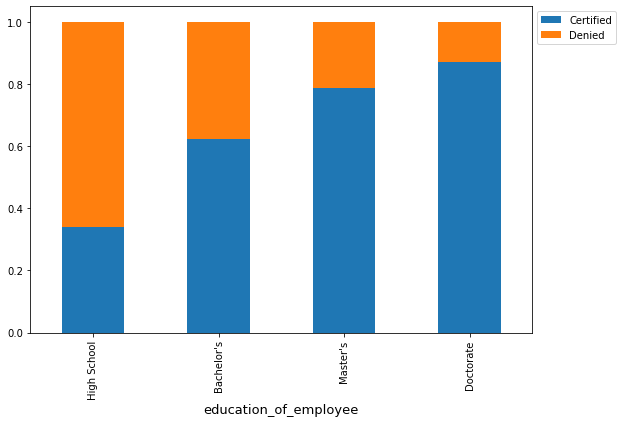

<IPython.core.display.Javascript object>

In [17]:
stacked_barplot(df, "education_of_employee", "case_status")

* Higher the education, more the chance of visa getting certified.
* The applicants with only high school education are facing more denial of visas. 
* 1912 out of 2192 of visa cases were certified for applicants with Doctorate education.
* More than 10000 applicants have Bachelor's degree.

#### 2. How does the visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


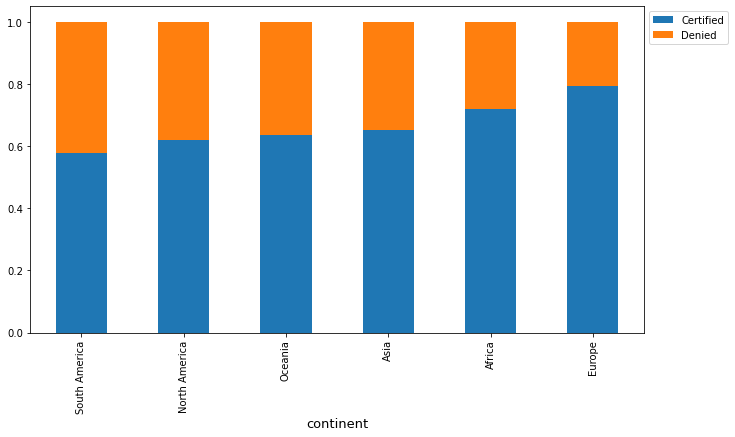

<IPython.core.display.Javascript object>

In [18]:
stacked_barplot(df, "continent", "case_status")

* Europe has higher rate of visas getting certified followed by Africa and Asia.
* There are more number of applicants from Asia whereas Oceania has the least number of visa applications.
* The rate of denial of visas are more for the applicants from South America.

#### 3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


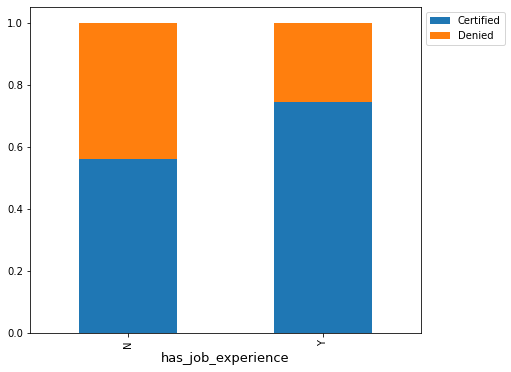

<IPython.core.display.Javascript object>

In [19]:
stacked_barplot(df, "has_job_experience", "case_status")

* The rate of visas getting certified is more in the case for applicants with job experience(~70%).
* 14802 applicants are with previous job experience. This comprises more than 50% of the total number of cases.

#### 4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


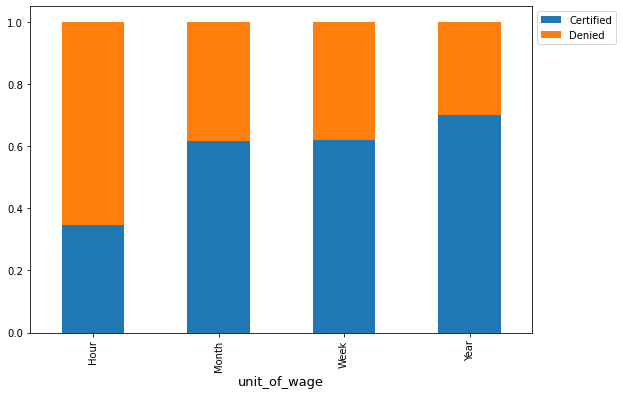

<IPython.core.display.Javascript object>

In [20]:
stacked_barplot(df, "unit_of_wage", "case_status")

* The denial rate of cases for applicants with hourly unit of wage is more.
* Most of the applicants are with Yearly unit of wage and have higher rate of visas getting certified.
* Monthly and weekly unit of wage have ~60% of visas getting certified.

### 5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

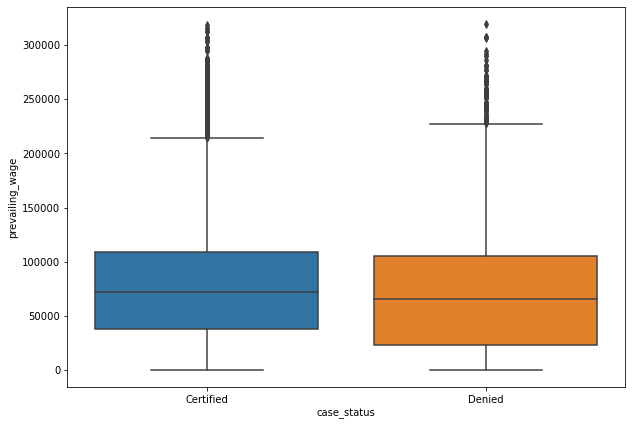

<IPython.core.display.Javascript object>

In [21]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x="case_status", y="prevailing_wage")
plt.show()

* There are many outliers in the data.
* The average prevailing_wage for the certified cases is slightly more than that for the denied cases.

### Univariate Analysis

**Observations on continent**

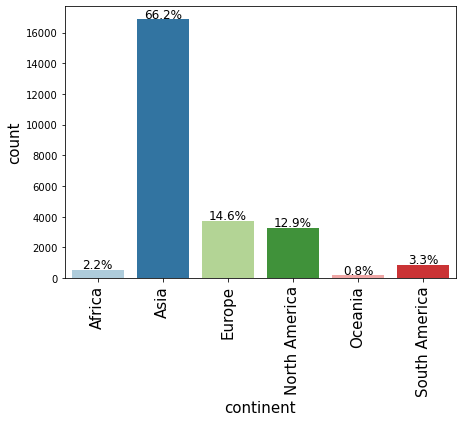

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(df, "continent")

* The most number of cases(66.2%) are from Asia.
* Africa, Oceania and South America together have less than 10% cases.

**Observations on education_of_employee**

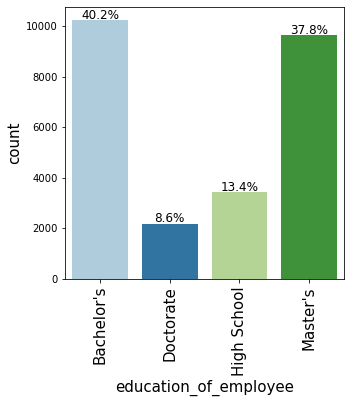

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(df, "education_of_employee")

* More number of employees have Bachelor's education. 
* 8.6% of the employees have doctorate education.

**Observations on has_job_experience**

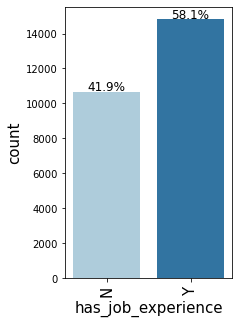

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(df, "has_job_experience")

* 58.1% of the emlployees have previous job experience.

**Observations on requires_job_trining**

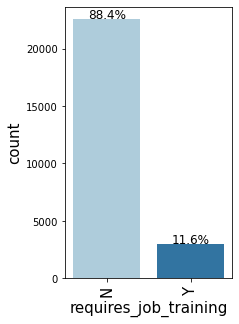

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(df, "requires_job_training")

* 88.4% of the applicants do not require job training.

**Observations on no_of_employees**

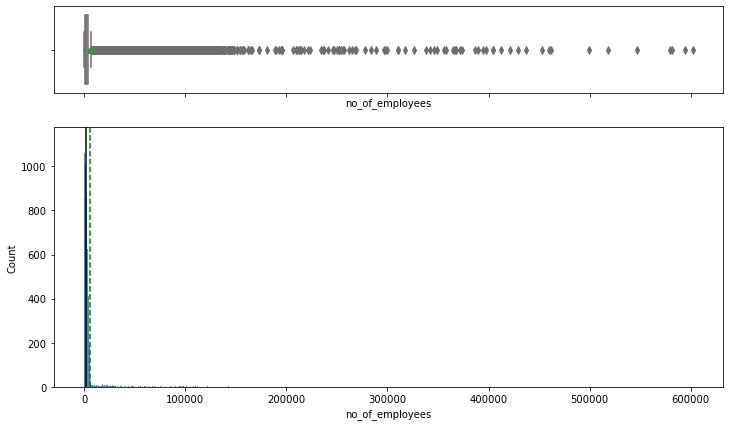

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(df, "no_of_employees")

* no_of_employees column has a highly right skewed distribution with a lot of outliers.
* The data has a wide range of values from -26 to 602069. But, most of the values are less than 1000.
* We can categorize the number of employees column to classes which represent the size of the company. This will help to create the model without loosing the information. 

In [27]:
# Changing the number of employees column to classes

# defining bins
bins = (-np.inf, 1000, 10000, 100000)

# defining labels
labels = ["small", "medium", "large"]

df["no_of_emp_class"] = pd.cut(x=df["no_of_employees"], bins=bins, labels=labels)

df.drop("no_of_employees", axis=1, inplace=True)

<IPython.core.display.Javascript object>

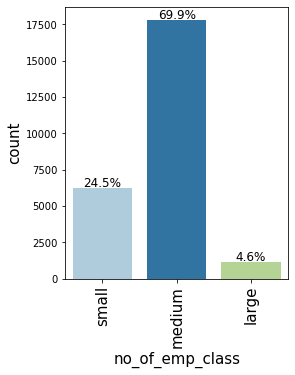

<IPython.core.display.Javascript object>

In [28]:
# Lets check the distribution of n0_of_emp_class column
labeled_barplot(df, "no_of_emp_class")

* 66.9% of the companies have employees in the range of 1000-10000. 
* 4.6% of the companies have more than 10000 employees.

**Observations on yr_of_estab**

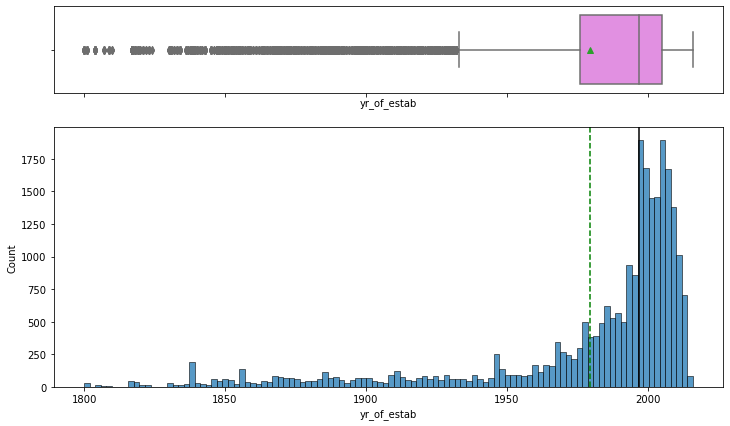

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(df, "yr_of_estab")

* yr_of_estab has a highly left skewed distribution with 50% of the cases after 1997.

**Observations on region_of_employment**

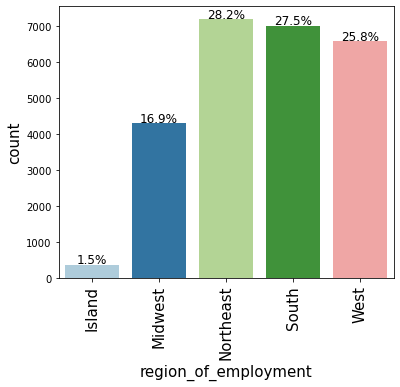

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(df, "region_of_employment")

* Northeast, South and West regions each have similar percentage of cases of more 25%.
* Island region has only 1.5% cases.

**Observations on prevailing_wage**

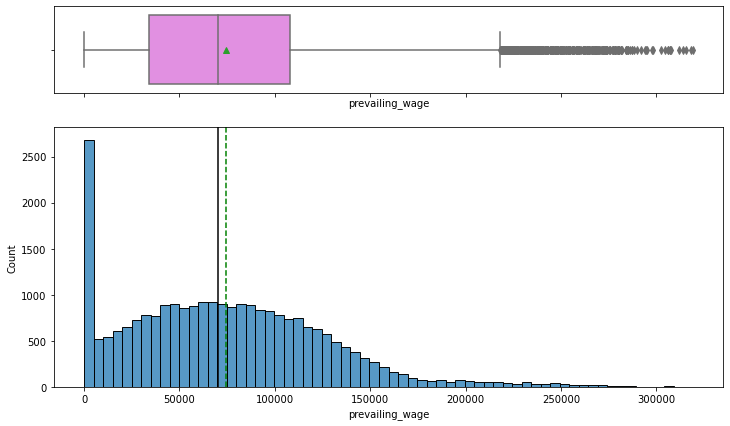

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(df, "prevailing_wage")

* The distribution is slightly right skewed with a spike close to zero.
* There are many outliers in the data.

**Observations on unit_of_wage**

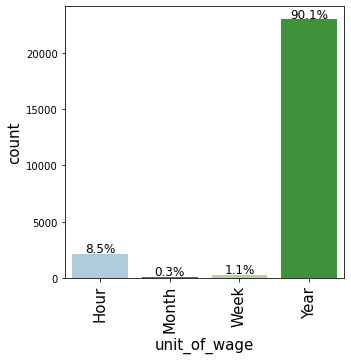

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(df, "unit_of_wage")

* 90.1% of the cases have Hourly unit of wage.
* Only 0.3% of cases have monthly unit of wage and 1.1% of the cases have Weekly unit of wage.

**Observations on full_time_position**

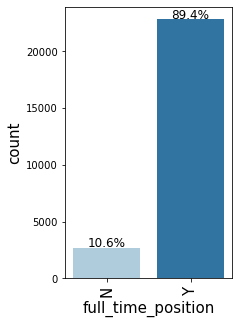

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(df, "full_time_position")

* 89.4% of the cases are for full time position.

**Observations on case_status**

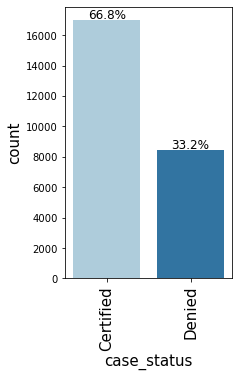

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(df, "case_status")

* 66.8% of the cases are Certified.

### Bivariate Analysis

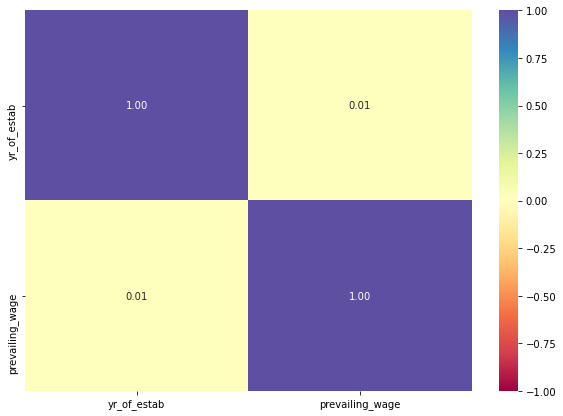

<IPython.core.display.Javascript object>

In [35]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is no correlation between the variables prevailing_wage and yr_of_estab.

#### requires_job_training vs case_status

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


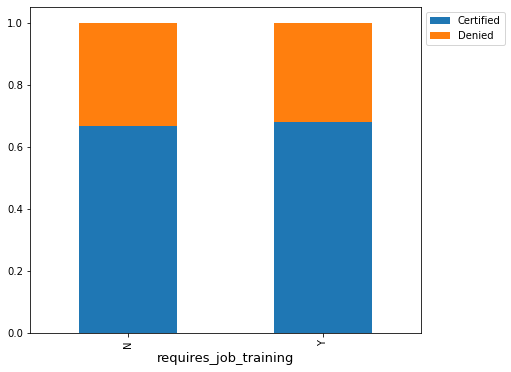

<IPython.core.display.Javascript object>

In [36]:
stacked_barplot(df, "requires_job_training", "case_status")

* The number of visas getting certified is almost similar for employees who need job training and who don't need job training.

#### no_of_emp_class vs case_status

case_status      Certified  Denied    All
no_of_emp_class                          
All                  16828    8381  25209
medium               11927    5876  17803
small                 4108    2133   6241
large                  793     372   1165
------------------------------------------------------------------------------------------------------------------------


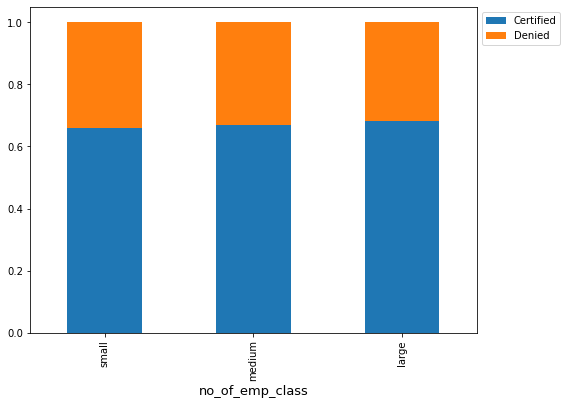

<IPython.core.display.Javascript object>

In [37]:
stacked_barplot(df, "no_of_emp_class", "case_status")

* The rate of cases getting certified is similar for all employee classes.

#### region_of_employment vs case_status

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


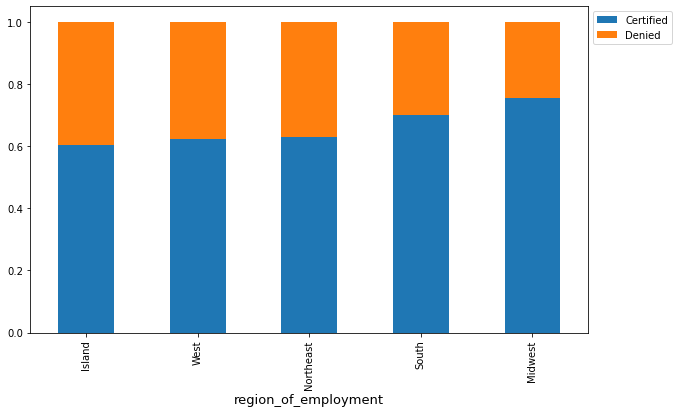

<IPython.core.display.Javascript object>

In [38]:
stacked_barplot(df, "region_of_employment", "case_status")

* Midwest region has higher rate of visas getting certified followed by South region.
* All other regions have a similar rate of visa certification of ~60%.

#### full_time_position vs case_status

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


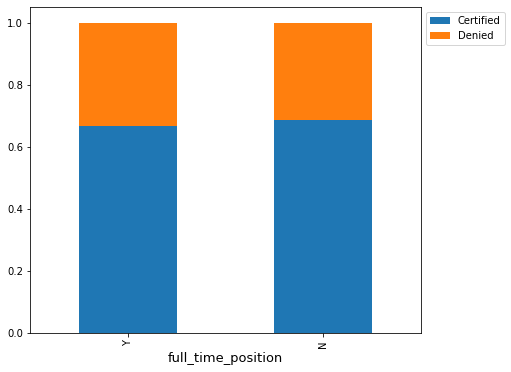

<IPython.core.display.Javascript object>

In [39]:
stacked_barplot(df, "full_time_position", "case_status")

* The rate of cases getting certified is similar whether the position is full time or not.

### Multivariate Analysis

#### unit_of_wage vs prevailing_wage vs case_status

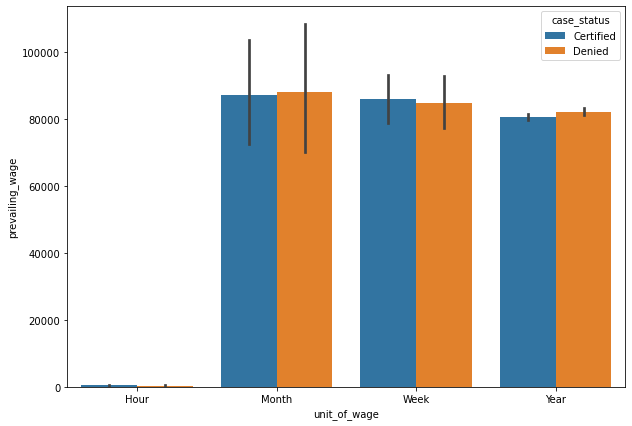

<IPython.core.display.Javascript object>

In [40]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df, x="unit_of_wage", y="prevailing_wage", hue="case_status")
plt.show()

* The average prevailing wage for Monthly and Yearly unit of wages is slightly less for certified visas when compared to visas which are denied.

#### region_of_employment vs prevailing_wage vs case_status

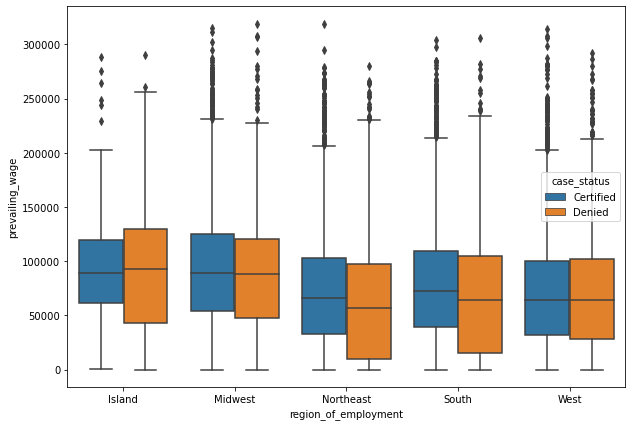

<IPython.core.display.Javascript object>

In [41]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x="region_of_employment", y="prevailing_wage", hue="case_status")
plt.show()

* The average prevailing wage is more in Midwest and Island regions for certified cases.
* If the region is Island and the prevailing wage is more then there is slightly more chance for the visa to get denied.

### Outlier Detection

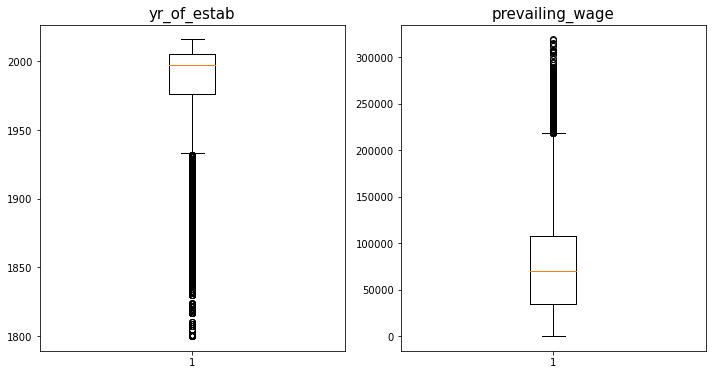

<IPython.core.display.Javascript object>

In [42]:
# let's plot the boxplots of all continuous variables to check for outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(10, 10))
for i, variable in enumerate(numerical_col):
    plt.subplot(2, 2, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable, fontsize=15)

plt.show()


* There are outliers for the yr_of_estab and prevailing_wage. We will not do outlier treatment for these values as these are proper values and will be important for the model. The prevailing wage has outliers as we have different unit of wages.

### <a id='link1'>Summary of EDA</a>
**Data Description:**

* Dependent variable is "case_status" which is representing whether the visa case status is certified or denied.
* There are no missing values in the dataset.

**Data Cleaning:**

* case_id is an ID variable so it is dropped from the data.
* no_of_employees column has a highly skewed data and this column is categorized to classes which represent the size of the company. So, we will a create new employee class column no_of_emp_class and drop the column no_of_employees.

**Observations from EDA:**

* `continent`: The most number of cases(66.2%) are from Asia. Africa, Oceania and South America together have less than 10% cases. 
* `education_of_employee`: More number of employees have Bachelor's education. 8.6% of the employees have doctorate education.
* `has_job_experience`: Humidity is normally distributed with a mean and median equal to 0.63. 
* `requires_job_training`: 88.4% of the applicants do not require job training.
* `no_of_employees`: no_of_employees column has a highly right skewed distribution with a lot of outliers. The data has a wide range of values from -26 to 602069. But, most of the values are less than 1000. We can categorize the number of employees column to classes which represent the size of the company. This will help to create the model without loosing the information.
* `no_of_emp_class`: 66.9% of the companies have employees in the range of 1000-10000. 4.6% of the companies have more than 10000 employees.
* `yr_of_estab`: yr_of_estab has a highly left skewed distribution with 50% of the cases after 1997.
* `region_of_employment`: Northeast, South and West regions each have similar percentage of cases of more 25%. Island region has only 1.5% cases.
* `prevailing_wage`: The distribution is slightly right skewed with a spike close to zero. There are many outliers in the data.
* `unit_of_wage`: 90.1% of the cases have Hourly unit of wage. Only 0.3% of cases have monthly unit of wage and 1.1% of the cases have Weekly unit of wage.
* `full_time_position`: 89.4% of the cases are for full time position.
* `case_status`: 66.8% of the cases are Certified.


* **case_status with continent**
    * Europe has higher rate of visas getting certified followed by Africa and Asia. There are more number of applicants from Asia whereas Oceania has the least number of visa applications. The rate of denial of visas are more for the applicants from South America.
* **case_status with education_of_employee**
    * Higher the education, more the chance of visa getting certified. The applicants with only high school education are facing more denial of visas. 1912 out of 2192 of visa cases were certified for applicants with Doctorate education. More than 10000 applicants have Bachelor's degree.
* **case_status with has_job_experience**
    * The rate of visas getting certified is more in the case for applicants with job experience. 14802 applicants are with previous job experience. This comprises more than 50% of the total number of cases
* **case_status with requires_job_training**
    * The number of visas getting certified is almost similar for employees who need job training and who don't need job training.
* **case_status with no_of_emp_class**
    * The rate of cases getting certified is similar for all employee classes.
* **case_status with region_of_employment**
    * Midwest region has higher rate of visas getting certified followed by South region. All other regions have a similar rate of visa certification of ~60%.
* **case_status with prevailing_wage**
    * The average prevailing_wage for the certified cases is slightly more than that for the denied cases.
* **case_status with unit_of_wage**
    * The denial rate of cases for applicants with hourly unit of wage is more. Most of the applicants are with Yearly unit of wage and have higher rate of visas getting certified. Monthly and weekly unit of wage have ~60% of visas getting certified.
* **case_status with full_time_position**
    * The rate of cases getting certified is similar whether the position is full time or not.
* **case_status with unit_of_wage and prevailing_wage**
    * The average prevailing wage for Monthly and Yearly unit of wages is slightly less for certified visas when compared to visas which are denied.
* **case_status with continent and prevailing_wage**
    * The average prevailing wage for certified cases is more for all continents except Europe.

### Data Preparation for modeling

In [43]:
df["case_status"] = df["case_status"].apply(
    lambda x: 1 if x == "Certified" else 0
)  # chnaging the dependent classes to 0 and 1

<IPython.core.display.Javascript object>

In [44]:
X = df.drop(["case_status"], axis=1)  # drop case_status from the data
y = df["case_status"]


X = pd.get_dummies(X, drop_first=True)  ## Create dummies for object variables

# Splitting data into train and test sets in the ratio 70:30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [45]:
y.value_counts(1)

1    0.667896
0    0.332104
Name: case_status, dtype: float64

<IPython.core.display.Javascript object>

In [46]:
y_test.value_counts(1)

1    0.677917
0    0.322083
Name: case_status, dtype: float64

<IPython.core.display.Javascript object>

### Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

### Which case is more important? 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 



### How to reduce the losses?

* `F1 Score` can be used as the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

#### Functions to calculate different metrics and confusion matrix

In [47]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [48]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Building bagging and boosting models

## Model Building - Bagging

### Decision Tree Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy   Recall  Precision        F1
0   0.65921  0.73736   0.754393  0.745779


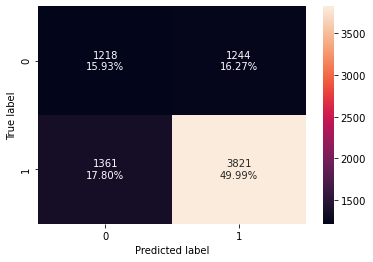

<IPython.core.display.Javascript object>

In [49]:
# Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train, y_train)

# Calculating different metrics
d_tree_model_train_perf = model_performance_classification_sklearn(
    d_tree, X_train, y_train
)
print("Training performance:\n", d_tree_model_train_perf)
d_tree_model_test_perf = model_performance_classification_sklearn(
    d_tree, X_test, y_test
)
print("Testing performance:\n", d_tree_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(d_tree, X_test, y_test)

* Decision tree is working well on the training data but is not able to generalize well on the test data which implies the model is overfitting the data.

### Bagging Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.982003  0.983018   0.989792  0.986393
Training performance:
    Accuracy    Recall  Precision        F1
0  0.690084  0.765342   0.774761  0.770022


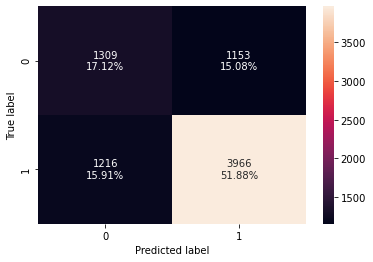

<IPython.core.display.Javascript object>

In [50]:
# Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

# Calculating different metrics
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
print("Training performance:\n", bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
print("Training performance:\n", bagging_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

* Bagging classifier is working well on the training data but is not able to generalize well on the test data which implies the model is overfitting the data.

### Random Forest Classifier

Training performance:
    Accuracy  Recall  Precision        F1
0  0.999944     1.0   0.999916  0.999958
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.717425  0.823234   0.774229  0.79798


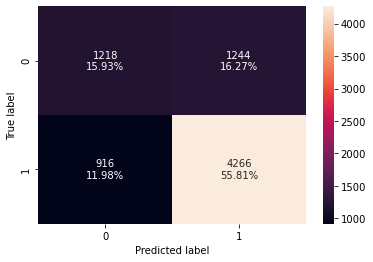

<IPython.core.display.Javascript object>

In [51]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
print("Training performance:\n", rf_estimator_model_train_perf)
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
print("Testing performance:\n", rf_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

* Random Forest classifier is working well on the training data but is not able to generalize well on the test data which implies the model is overfitting the data.

## Model Improvement - Bagging

### Hyperparameter Tuning - Decision Tree

In [52]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 30, 5),
    "min_samples_leaf": [3, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 7],
    "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0   0.70795  0.931734   0.714758  0.808949
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.717295  0.931301   0.727794  0.817066


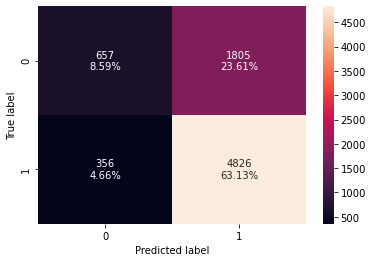

<IPython.core.display.Javascript object>

In [53]:
# Calculating different metrics
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
print("Training performance:\n", dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
print("Testing performance:\n", dtree_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

* The tuned decision tree model is giving a very generalized performance on training and testing dataset.
* The tuned decision tree gives F1 score of 81.7%.
* As per the confusion matrix, there is a good prediction rate for Certified cases. But, there are more false positive cases.

### Hyperparameter Tuning - Bagging Classifier

In [54]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8, 0.9],
    "max_features": [0.7, 0.8, 0.9],
    "n_estimators": [30, 40, 50, 90, 100],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=90,
                  random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.976284  0.998986   0.966408  0.982427
Training performance:
    Accuracy    Recall  Precision        F1
0  0.730769  0.888653   0.756655  0.817359


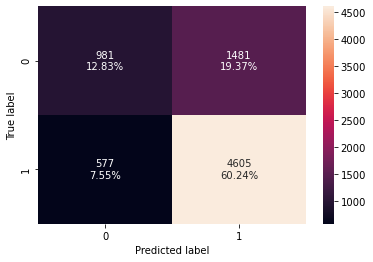

<IPython.core.display.Javascript object>

In [55]:
# Calculating different metrics
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
print("Training performance:\n", bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
print("Training performance:\n", bagging_estimator_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

* The test performance have been improved after tuning the bagging classifier, but the model is not able to give a generalized performance. 
* The model is overfitting the training data.
* As per the confusion matrix, the model is able to make a good prediction of Certified cases.

### Hyperparameter Tuning - Random Forest Classifier

In [56]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(
    class_weight="balanced", random_state=1, oob_score=True, bootstrap=True
)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}


# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       max_features='sqrt', min_samples_split=7,
                       n_estimators=10, oob_score=True, random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0    0.7232  0.772981   0.802614  0.787519
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.720434  0.770745   0.808011  0.788938


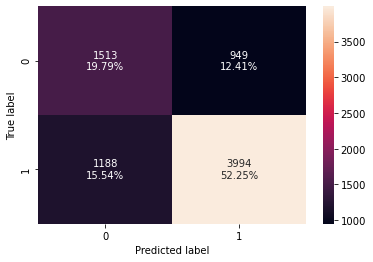

<IPython.core.display.Javascript object>

In [57]:
# Calculating different metrics
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
print("Training performance:\n", rf_tuned_model_train_perf)
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
print("Testing performance:\n", rf_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

* The tuned random forest is giving a generalized performance on training and testing data.
* This model is giving an F1 score of 78.8% which is slightly less than the tuned decision tree model.

## Model Building - Boosting

### AdaBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.736488  0.885012   0.758289  0.816764
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.739273  0.885565   0.766238  0.821592


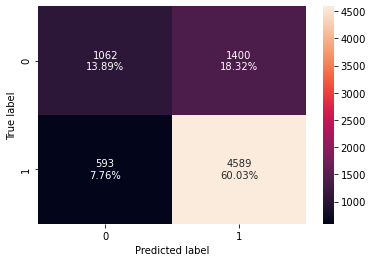

<IPython.core.display.Javascript object>

In [58]:
# Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

# Calculating different metrics
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
print("Training performance:\n", ab_classifier_model_train_perf)
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
print("Testing performance:\n", ab_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

* AdaBoost classifier is giving a generalized performance on training and testing dataset.
* This model gives an F1 score of 82.1% which is slightly more than the tuned decision tree model.

### Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.755102  0.873268   0.782793  0.825559
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.752486  0.867426   0.788596  0.826135


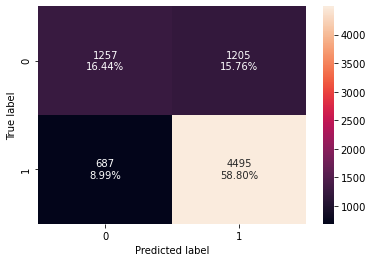

<IPython.core.display.Javascript object>

In [59]:
# Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

# Calculating different metrics
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
print("Training performance:\n", gb_classifier_model_train_perf)
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
print("Testing performance:\n", gb_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

* Gradient Boosting Classifier is giving a generalized performance on training and testing dataset.
* This model gives an F1 score of 82.6% which is slightly more than the AdaBoost Classifier.

### XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.821092  0.919905   0.829183  0.872191
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.735871  0.851602   0.779269  0.813831


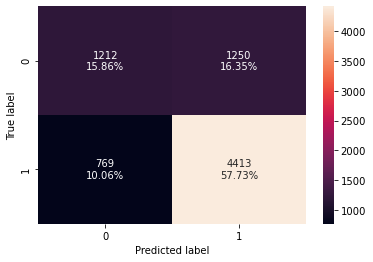

<IPython.core.display.Javascript object>

In [60]:
# Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

# Calculating different metrics
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)
print("Training performance:\n", xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)
print("Testing performance:\n", xgb_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

* XGBoost Classifier is not able to provide a very generalized performance on training and test data set.
* The model is overfitting the training dataset.

## Model Improvement - Boosting

### Hyperparameter Tuning - AdaBoost Classifier

In [61]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=3, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(50, 100, 10),
    "learning_rate": np.arange(0.1, 1, 0.1),
}

# Type of scoring used to compare parameter  combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.2, random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0   0.71821  0.780416   0.791924  0.786128
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.718472  0.783674   0.797526  0.790539


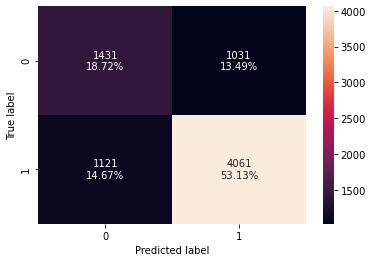

<IPython.core.display.Javascript object>

In [62]:
# Calculating different metrics
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
print("Training performance:\n", abc_tuned_model_train_perf)
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
print("Testing performance:\n", abc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

* The tuned AdaBoost model is giving a generalized performance on training and testing dataset.
* The values of performance metrics have decreased for the tuned AdaBoost model when compared to the model without hyperparameter tuning.

### Hyperparameter Tuning - Gradient Boosting Classifier

In [63]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, random_state=1, subsample=0.9)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision       F1
0  0.753869  0.874028   0.781108  0.82496
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.751047  0.868005   0.786776  0.825397


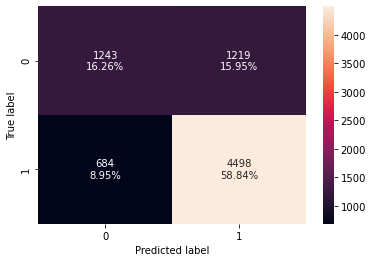

<IPython.core.display.Javascript object>

In [64]:
# Calculating different metrics
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
print("Training performance:\n", gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
print("Testing performance:\n", gbc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

* The tuned Gradient Boosting Classifier is giving a very genralized performance on training and testing dataset.
* Gradient Boosting Classifier without hyperparameter tuning has a slightly higher performance than this model.

### Hyperparameter Tuning - XGBoost Classifier

In [65]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": [30, 50, 100],
    "scale_pos_weight": [1, 2, 5],
    "subsample": [0.7, 0.9, 1],
    "gamma": [1, 3, 5],
    "learning_rate": [0.05, 0.1, 0.2],
    "colsample_bytree": [0.7, 0.9, 1],
    "colsample_bylevel": [0.5, 0.7, 1],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, eval_metric='logloss', gamma=3,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.7, tree_method='exact', validate_parameters=1,
              verbosity=None)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.759587  0.882308   0.782951  0.829666
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.750654  0.871285   0.784672  0.825713


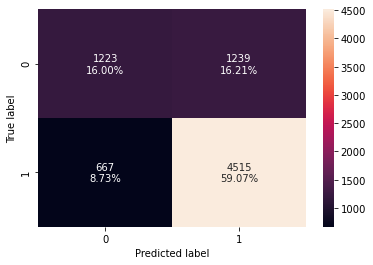

<IPython.core.display.Javascript object>

In [66]:
# Calculating different metrics
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
print("Training performance:\n", xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
print("Testing performance:\n", xgb_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

* The tuned XGBoost model is giving a generalized performance on training and testing dataset with a good F1 score of 82.57%.

### Stacking Classifier

In [67]:
estimators = [
    ("Decision Tree - Tuned", dtree_estimator),
    ("AdaBoost", ab_classifier),
    ("Gradient Boost", gbc_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('Decision Tree - Tuned',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=10,
                                                       max_leaf_nodes=2,
                                                       min_impurity_decrease=0.0001,
                                                       min_samples_leaf=3,
                                                       random_state=1)),
                               ('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boost',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           random...
                                                 gpu_id=-1,
                                                 im

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.754878  0.866509   0.786021  0.824305
Testing performance:
    Accuracy  Recall  Precision        F1
0  0.750654  0.8599   0.790632  0.823812


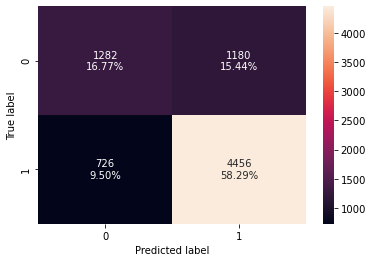

<IPython.core.display.Javascript object>

In [68]:
# Calculating different metrics
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, X_train, y_train
)
print("Training performance:\n", stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, X_test, y_test
)
print("Testing performance:\n", stacking_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

* Stacking Classifier is giving a genralized performance similar to tuned XGBoost and Gradient Boosting classifier.

## Model Performance Comparison and Conclusions

In [69]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        d_tree_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.707950,0.999944,0.723200,0.982003,0.976284,0.736488,0.718210,0.755102,0.753869,0.821092,0.759587,0.754878
Recall,1.0,0.931734,1.000000,0.772981,0.983018,0.998986,0.885012,0.780416,0.873268,0.874028,0.919905,0.882308,0.866509
Precision,1.0,0.714758,0.999916,0.802614,0.989792,0.966408,0.758289,0.791924,0.782793,0.781108,0.829183,0.782951,0.786021
F1,1.0,0.808949,0.999958,0.787519,0.986393,0.982427,0.816764,0.786128,0.825559,0.824960,0.872191,0.829666,0.824305


<IPython.core.display.Javascript object>

In [70]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        d_tree_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.659210,0.717295,0.717425,0.720434,0.690084,0.730769,0.739273,0.718472,0.752486,0.751047,0.735871,0.750654,0.750654
Recall,0.737360,0.931301,0.823234,0.770745,0.765342,0.888653,0.885565,0.783674,0.867426,0.868005,0.851602,0.871285,0.859900
Precision,0.754393,0.727794,0.774229,0.808011,0.774761,0.756655,0.766238,0.797526,0.788596,0.786776,0.779269,0.784672,0.790632
F1,0.745779,0.817066,0.797980,0.788938,0.770022,0.817359,0.821592,0.790539,0.826135,0.825397,0.813831,0.825713,0.823812


<IPython.core.display.Javascript object>

* The majority of the models are performing well in terms of F1 score.
* Gradient Boosting Classifier has the highest F1 score of 82.61%. The tuned XGBoost classifier also gives a similar performance with 82.57% of F1 score.

### Feature importance of Gradient Boost Classifier

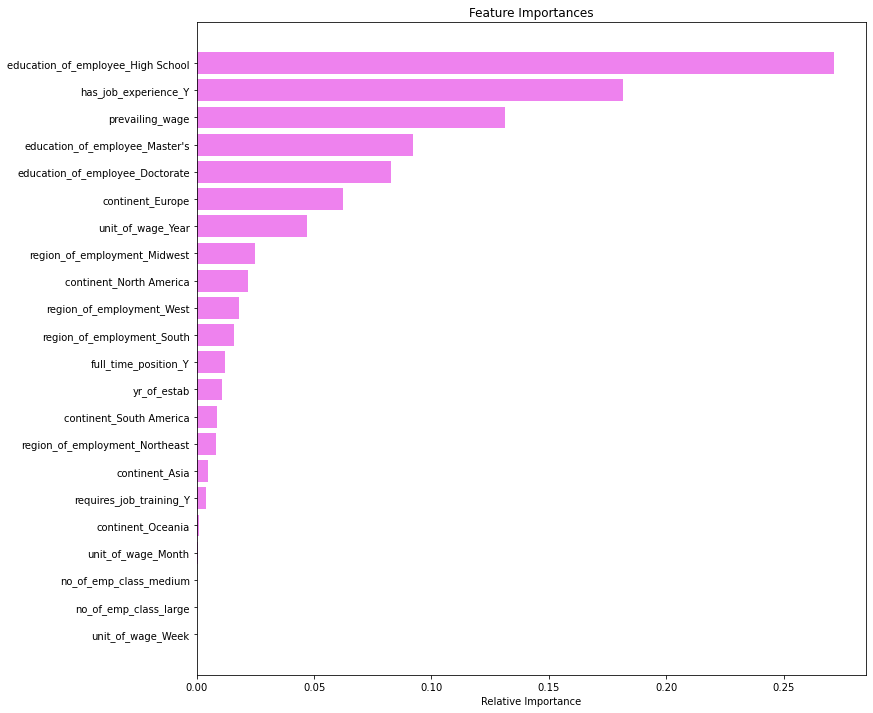

<IPython.core.display.Javascript object>

In [71]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* As per the Gradient Boosting classifier, education_of_employee_High School is the most important feature in predicting the visa cases followed by has_job_experience_Y and prevailing_wage. 

## Actionable Insights and Recommendations

1. The education of the applicant plays an important role in visa getting certified or not. Higher the education more the rate of visa approval. 90% of applicants with Doctorate education are getting the visa certified whereas as more than 60% of denial for applicants with only High School education.

2. Another most important factor is the experience of the applicant. An applicant with job experience has more than 70% chances of visa getting certified.

3. Europe has higher rate of visas getting certified followed by Africa and Asia. The rate of denial of visas are more for the applicants from South America. The most number of cases(66.2%) are from Asia whereas Africa, Oceania and South America together have less than 10% cases.

4. The average prevailing_wage for the certified cases is slightly more than that for the denied cases. The average prevailing wage is more in Midwest and Island regions for certified cases. But, if the region is Island and the prevailing wage is more then there is slightly more chance for the visa to get denied.

5. The denial rate of cases for applicants with hourly unit of wage is more. Most of the applicants are with Yearly unit of wage(~90%) and have higher rate of visas getting certified. Monthly and weekly unit of wage have ~60% of visas getting certified. The average prevailing wage for Monthly and Yearly unit of wages is slightly less for certified visas when compared to other unit of wages.

6. The number of visas getting certified is almost similar for employees who need job training and who don't need job training. 88.4% of the applicants do not require job training.

7. The rate of cases getting certified is similar whether the position is full time or part time. 89.4% of the cases are for full time position.

8. The number of employees in a company and the year of establishment of the company has very less impact on the rate which visas are getting certified.

========================================================================================================================